***SAMPLING ASSIGNMENT***<br>**Name:** Karan Nigam<br>
**Roll Number:** 102317145<br> 3Q21



1)Convert dataset to Balanced class dataset

In [1]:
pip install imbalanced-learn


In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE

In [3]:
df=pd.read_csv('Creditcard_data.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df['Class'].value_counts()

,count
Class,
0,763
1,9


In [6]:
X=df.drop(columns=['Class'])
y=df['Class']

In [7]:
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X,y)

In [8]:
y_resampled.value_counts()

,count
Class,
0,763
1,763


In [9]:
balanced_df=pd.concat([X_resampled,y_resampled],axis=1)
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Since our original dataset has only 9 fraud transactions and 763 normal,therefore undersmapling method would delete a lot of information,instead we use Oversampling method here to balance our dataset.


In [27]:
balanced_df.to_csv('balanced_df.csv',index=False)

2)Create 5 samples-Create 5 Folds using Stratified 5-Fold Cross Validation(Stratified makes sure that each sample will have some fraud transactions)


In [10]:
from sklearn.model_selection import StratifiedKFold

In [13]:
X=balanced_df.drop(columns=['Class'])
y=balanced_df['Class']

In [14]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
sample_no = 1
for train_index, test_index in skf.split(X, y):
    print(f"\nSample {sample_no}")

    X_train = X.iloc[train_index]
    X_test  = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test  = y.iloc[test_index]

    print("Training class distribution:")
    print(y_train.value_counts())

    print("Testing class distribution:")
    print(y_test.value_counts())

    sample_no += 1


Sample 1
Training class distribution:
Class
0    610
1    610
Name: count, dtype: int64
Testing class distribution:
Class
0    153
1    153
Name: count, dtype: int64

Sample 2
Training class distribution:
Class
1    611
0    610
Name: count, dtype: int64
Testing class distribution:
Class
0    153
1    152
Name: count, dtype: int64

Sample 3
Training class distribution:
Class
1    611
0    610
Name: count, dtype: int64
Testing class distribution:
Class
0    153
1    152
Name: count, dtype: int64

Sample 4
Training class distribution:
Class
0    611
1    610
Name: count, dtype: int64
Testing class distribution:
Class
1    153
0    152
Name: count, dtype: int64

Sample 5
Training class distribution:
Class
0    611
1    610
Name: count, dtype: int64
Testing class distribution:
Class
1    153
0    152
Name: count, dtype: int64


3)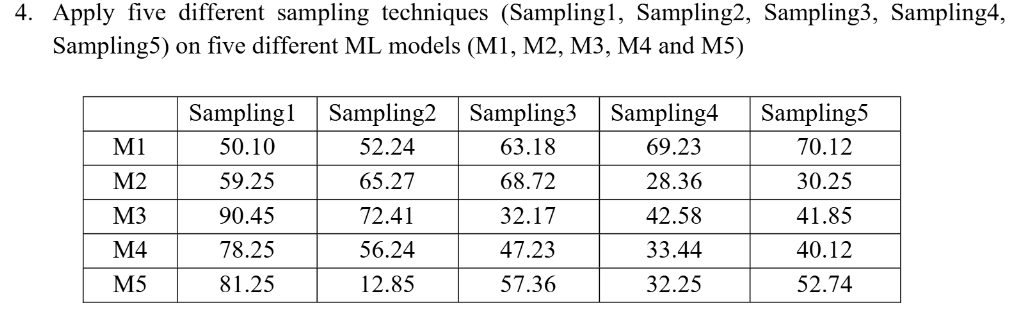

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

In [16]:
samplings = {
    "Sampling1": None,  # No sampling
    "Sampling2": RandomOverSampler(random_state=42),
    "Sampling3": SMOTE(random_state=42),
    "Sampling4": RandomUnderSampler(random_state=42),
    "Sampling5": SMOTETomek(random_state=42)
}
models = {
    "M1": LogisticRegression(max_iter=1000),
    "M2": DecisionTreeClassifier(random_state=42),
    "M3": RandomForestClassifier(random_state=42),
    "M4": KNeighborsClassifier(),
    "M5": SVC()
}



In [17]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = pd.DataFrame(index=models.keys(), columns=samplings.keys())


In [18]:
for model_name, model in models.items():
    for samp_name, sampler in samplings.items():

        accuracies = []

        for train_idx, test_idx in skf.split(X, y):

            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Apply sampling ONLY on training data
            if sampler is not None:
                X_train, y_train = sampler.fit_resample(X_train, y_train)

            # Train model
            model.fit(X_train, y_train)

            # Predict
            y_pred = model.predict(X_test)

            # Accuracy
            accuracies.append(accuracy_score(y_test, y_pred))

        # Average accuracy over 5 folds
        results.loc[model_name, samp_name] = np.mean(accuracies) * 100


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [19]:
print("Accuracy Table (%)")
print(results)


Accuracy Table (%)
    Sampling1  Sampling2  Sampling3  Sampling4  Sampling5
M1  92.396657  92.265509  92.331083  92.265509  92.462017
M2  97.380264  97.380264  97.380264   97.31469  97.444552
M3  99.541626  99.541626  99.541626  99.410693  99.345119
M4   85.51784   85.51784   85.51784   85.51784  84.731598
M5  67.497053  67.497053  67.497053  67.497053  67.497053


since the random forst classifier if clearly the most domonent one in all thge 5 models for eaxch sample,we will now try the same thing by replacing SVC with XGBoost.

In [20]:
pip install xgboost


In [21]:
from xgboost import XGBClassifier


In [22]:
models = {
    "M1": LogisticRegression(max_iter=1000),
    "M2": DecisionTreeClassifier(random_state=42),
    "M3": RandomForestClassifier(random_state=42),
    "M4": KNeighborsClassifier(),
    "M5": XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}


In [24]:
for model_name, model in models.items():
    for samp_name, sampler in samplings.items():

        fold_accuracies = []

        for train_idx, test_idx in skf.split(X, y):

            # Split data
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Apply sampling ONLY on training data
            if sampler is not None:
                X_train, y_train = sampler.fit_resample(X_train, y_train)

            # Train model
            model.fit(X_train, y_train)

            # Predict
            y_pred = model.predict(X_test)

            # Accuracy
            acc = accuracy_score(y_test, y_pred)
            fold_accuracies.append(acc)

        # Average accuracy over 5 folds (percentage)
        results.loc[model_name, samp_name] = np.mean(fold_accuracies) * 100


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [25]:
print("\nFinal Accuracy Table (%)")
print(results)



Final Accuracy Table (%)
    Sampling1  Sampling2  Sampling3  Sampling4  Sampling5
M1  92.396657  92.265509  92.331083  92.265509  92.462017
M2  97.380264  97.380264  97.380264   97.31469  97.444552
M3  99.541626  99.541626  99.541626  99.410693  99.345119
M4   85.51784   85.51784   85.51784   85.51784  84.731598
M5  98.820315  98.951463  98.820315  98.885889  98.689382


In [26]:
results.to_csv("accuracy_results.csv")


**4)Determine which sampling techniques give higher accuracy for which model?**


Clearly all the sampling techniques work best under RandomForestClassifier,followed by XGBoost Classifier,then Decision Trees,then Logistic Regression and finally  K-Nearest Neighbors classifier appears to be the worst classifier for all the sampling techniques.